In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree, BallTree, NearestNeighbors
import statistics as stats

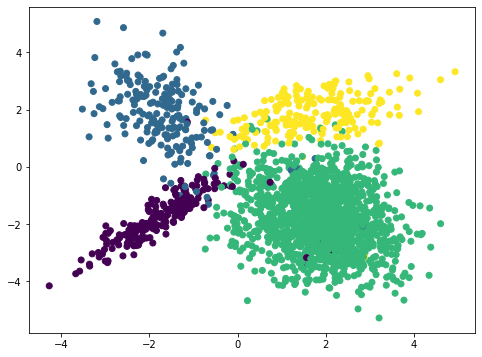

In [71]:
plt.figure(figsize=(8 , 6))
X , y = make_classification(n_samples=2000 , n_features=2 , class_sep=1.8 , n_redundant=0 ,
                           random_state=23 , n_clusters_per_class=1 , n_classes=4 , 
                           weights=[0.1 , 0.1 , 0.7 , 0.1])

plt.scatter(X[: , 0] , X[: , 1], c=y);

In [72]:
np.unique(y , return_counts=True)

(array([0, 1, 2, 3]), array([ 207,  204, 1386,  203], dtype=int64))

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=0 , stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 2)
(400, 2)
(1600,)
(400,)


In [74]:
query_point = np.array([[-2 , 2]])

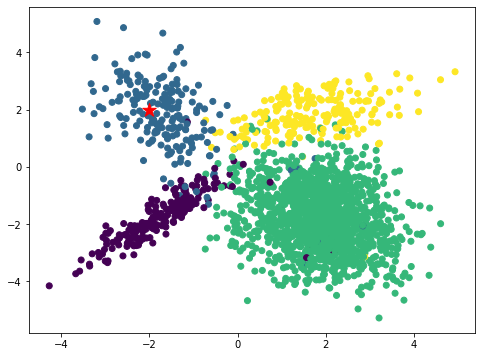

In [75]:
plt.figure(figsize=(8 , 6))
plt.scatter(X[: , 0] , X[: , 1], c=y);
plt.scatter(query_point[: , 0] , query_point[: , 1], color='r', s=200 , marker='*');

In [80]:
class KNN:
    
    def __init__(self , k):
        self.k = k

        
    def fit(self , x , y):
        self.x = x
        self.y = y
        
    def predict(self , x):
        y_hats = []
        for i in x:
            dist = np.linalg.norm(self.x - i , axis=1)
            sort_dist = np.argsort(dist)[:self.k]
            labels = self.y[sort_dist]
            y_hat = stats.mode(labels)
            y_hats.append(y_hat)
        return y_hats
    
    def score(self , x , y):
        y_hat = self.predict(x)
        score = np.sum(y_hat == y) / len(y)
        return score

In [81]:
model = KNN(len(y_train))

In [82]:
model.fit(X_train , y_train)

In [85]:
model.predict(query_point)[0] , stats.mode(y)

(2, 2)